In [1]:
import pandas as pd
import re
import sys
import os
import numpy as np
import pickle
import time

In [2]:
print("Parsing Bible...")

book_list = os.listdir("kjv")
book_list = sorted(book_list)

Bible = []

for bookname in book_list:
    
    print(bookname)
    
    book_num = bookname[:2]
    
    with open("kjv/" + bookname) as f:
        f_input = f.read()
    spl = re.split(r"(\{[0-9]+\:[0-9]+\})", f_input)
#     book = []
    book_title = spl.pop(0).strip()
    
    
    while(spl):
        
        num = spl.pop(0)
        text = spl.pop(0)
    #     book.verses.append((num.strip(), verse.strip()))
        chapter, paragraph = num.strip()[1:-1].split(":")

        if int(chapter) > 99: 
            chapter = str(chapter)
        elif int(chapter) > 9:
            chapter = "0{}".format(chapter)
        else:
            chapter = "00{}".format(chapter)

        if int(paragraph) > 99: 
            paragraph = "{}".format(paragraph)
        elif int(paragraph) > 9:
            paragraph = "0{}".format(paragraph)
        else:
            paragraph = "00{}".format(paragraph)

        Bible.append({
            "book": book_num,
            "chapter": chapter,
            "paragraph": paragraph,
            "short_name": bookname[3:-4],
            "text": re.sub("\s+", " ", text.strip())
        })
        
Bible = pd.DataFrame(Bible)

NT = Bible[(Bible.book.astype(int) >= 40) & (Bible.book.astype(int) <= 66)]

print("Done.")

Parsing Bible...
01-Genesis.txt
02-Exodus.txt
03-Lev.txt
04-Num.txt
05-Deut.txt
06-Joshua.txt
07-Judges.txt
08-Ruth.txt
09-1Sam.txt
10-2Sam.txt
11-1Kings.txt
12-2Kings.txt
13-1Chron.txt
14-2Chron.txt
15-Ezra.txt
16-Nehemiah.txt
17-Esther.txt
18-Job.txt
19-Psalms.txt
20-Proverbs.txt
21-Eccl.txt
22-Song.txt
23-Isaiah.txt
24-Jeremiah.txt
25-Lament.txt
26-Ezekiel.txt
27-Daniel.txt
28-Hosea.txt
29-Joel.txt
30-Amos.txt
31-Obadiah.txt
32-Jonah.txt
33-Micah.txt
34-Nahum.txt
35-Habakkuk.txt
36-Zeph.txt
37-Haggai.txt
38-Zech.txt
39-Malachi.txt
40-Matthew.txt
41-Mark.txt
42-Luke.txt
43-John.txt
44-Acts.txt
45-Romans.txt
46-1Cor.txt
47-2Cor.txt
48-Gal.txt
49-Eph.txt
50-Philip.txt
51-Col.txt
52-1Thes.txt
53-2Thes.txt
54-1Tim.txt
55-2Tim.txt
56-Titus.txt
57-Philemon.txt
58-Hebrews.txt
59-James.txt
60-1Peter.txt
61-2Peter.txt
62-1John.txt
63-2John.txt
64-3John.txt
65-Jude.txt
66-Rev.txt
67-1Esdras.txt
68-2Esdras.txt
69-Tobit.txt
70-Judith.txt
71-GkEsther.txt
72-Wisdom.txt
73-Sirach.txt
74-Baruch.txt


In [4]:
Bible.head()

,book,chapter,paragraph,short_name,text
0,01,001,001,Genesis,In the beginning God created the heaven and th...
1,01,001,002,Genesis,"And the earth was without form, and void; and ..."
2,01,001,003,Genesis,"And God said, Let there be light: and there wa..."
3,01,001,004,Genesis,"And God saw the light, that [it was] good: and..."
4,01,001,005,Genesis,"And God called the light Day, and the darkness..."


In [5]:
NT

,book,chapter,paragraph,short_name,text
23145,40,001,001,Matthew,"The book of the generation of Jesus Christ, th..."
23146,40,001,002,Matthew,Abraham begat Isaac; and Isaac begat Jacob; an...
23147,40,001,003,Matthew,And Judas begat Phares and Zara of Thamar; and...
23148,40,001,004,Matthew,And Aram begat Aminadab; and Aminadab begat Na...
23149,40,001,005,Matthew,And Salmon begat Booz of Rachab; and Booz bega...
23150,40,001,006,Matthew,And Jesse begat David the king; and David the ...
23151,40,001,007,Matthew,And Solomon begat Roboam; and Roboam begat Abi...
23152,40,001,008,Matthew,And Asa begat Josaphat; and Josaphat begat Jor...
23153,40,001,009,Matthew,And Ozias begat Joatham; and Joatham begat Ach...
23154,40,001,010,Matthew,And Ezekias begat Manasses; and Manasses begat...


In [106]:
def get_books(text_df):
    books = []
    for book_n in text_df.book.unique():
        book = text_df[text_df.book == book_n]
        text = ""
        for idx, paragraph in book.iterrows():
            text += " " + paragraph['text']
        books.append({
            "book": book_n,
            "text": text
        })
    books = pd.DataFrame(books)
    return books

def get_chapters(text_df):
    chapters = []
    for book_n in text_df.book.unique():
        book = text_df[text_df.book == book_n]
        for chapter_n in book.chapter.unique():
            chapter = book[book.chapter == chapter_n]
            text = ""
            for idx, paragraph in chapter.iterrows():
                text += " " + paragraph['text']
            chapters.append({
                "book": book_n,
                "chapter": chapter_n,
                "text": text
            })
    chapters = pd.DataFrame(chapters)
    return chapters

***

In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
books_all = get_books(Bible)
chapters_all = get_chapters(Bible)

books_NT = get_books(NT)
chapters_NT = get_chapters(NT)

In [131]:
def kw_occ(keyword, df):
    keyword_occurences = []
    for idx, row in df.iterrows():
        text = row['text']
        occ = len(re.findall(r"\b{}".format(keyword), text, re.IGNORECASE))
        keyword_occurences.append(occ)
    return keyword_occurences

In [153]:
def plot_kw(ax, kw, df):
    occ = kw_occ(kw, df)
    ax.plot(list(range(len(occ))), occ, alpha=0.5)
    

def plot_kws(kws, granularity, title):
    
    if granularity == "ball":
        df = books_all
    elif granularity == "call":
        df = chapters_all
    elif granularity == "bnt":
        df = books_NT
    elif granularity == "cnt":
        df = chapters_NT
        
    fig, ax = plt.subplots(1, 1, figsize=(17,7)) 
    for kw in keywords:
        plot_kw(ax, kw, df)
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.book, size='small')
    ax.legend(keywords)
    ax.set_title(title)
    
    plt.savefig(title)

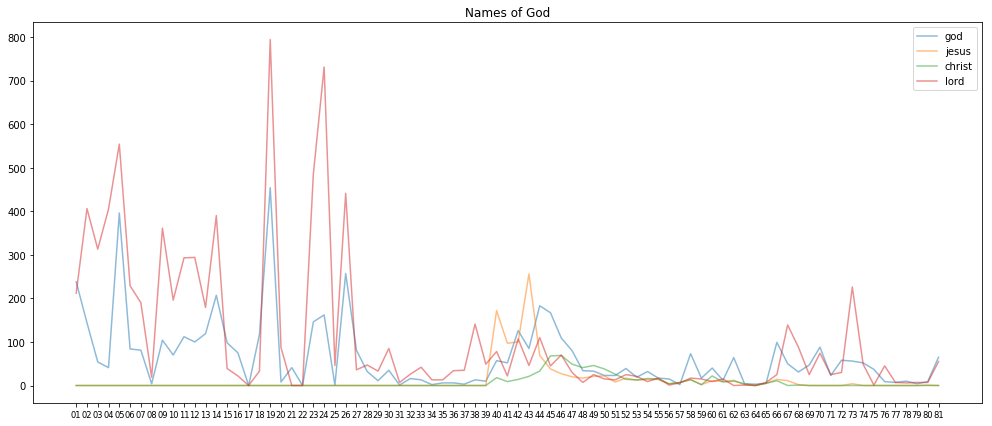

In [154]:
keywords = ["god", "jesus", "christ", "lord"]
plot_kws(keywords, "ball", "Names of God")

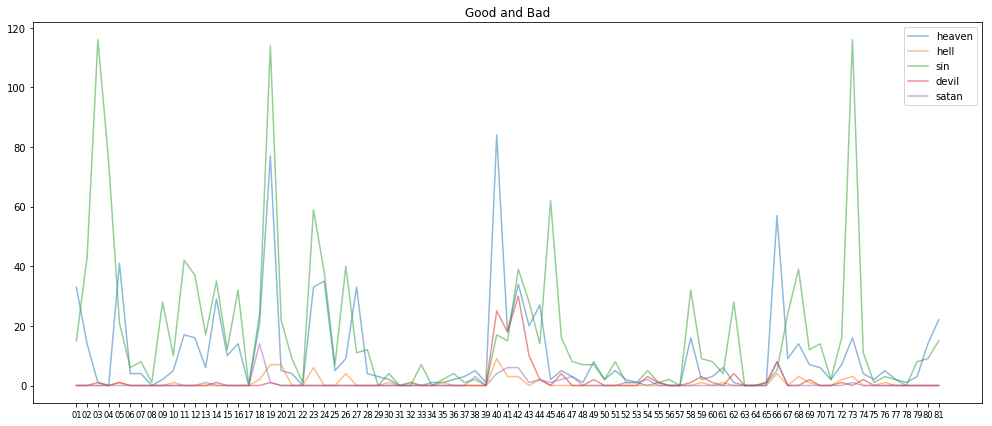

In [155]:
keywords = ["heaven", "hell", "sin", "devil", "satan"]
plot_kws(keywords, "ball", "Good and Bad")

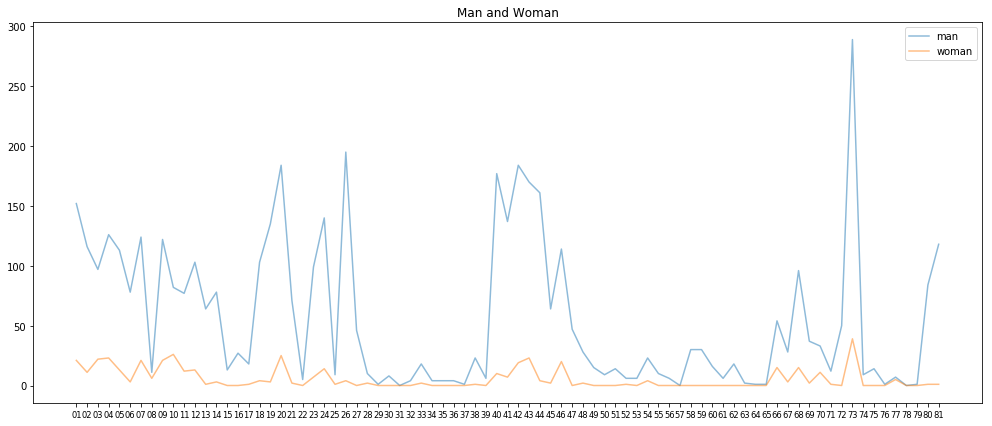

In [156]:
keywords = ["man", "woman"]
plot_kws(keywords, "ball", "Man and Woman")

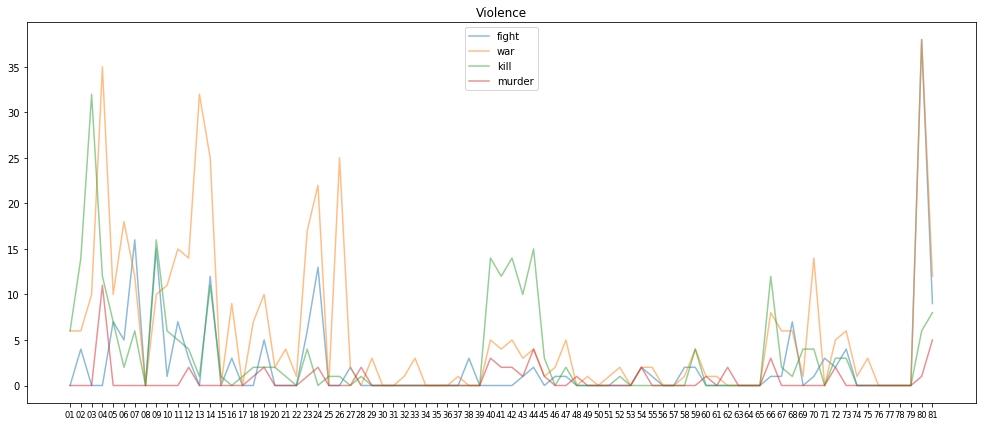

In [157]:
keywords = ["fight", "war", "kill", "murder"]
plot_kws(keywords, "ball", "Violence")

In [ ]:
w